## 1. Loading the data.

In [1]:
# import required libraries

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# read the data

translation_data_df = pd.read_excel("datascientist-task-data-files/translation-data.xlsx") 


In [3]:
# checking the shape of the data

translation_data_df.shape


(100, 2)

In [4]:
# checking out first five sample sentences of the translation data

translation_data_df.head()


,English,German
0,"""The mask with a grinning man's face appears c...",Die Maske mit grinsendem Männergesicht wirkt d...
1,The WSWS posted this comment on the slanderous...,Die WSWS hatte den folgenden Kommentar zu dies...
2,The Haitian manner of spelling 'vodou' was int...,"""Für diese Ausstellung wurde bewusst die haiti..."
3,The database also records new manufacturers in...,Die Datenbank nimmt bei jeder neuen Herausgabe...
4,Medially this situation is hushed up with just...,"Medial wird diese Situation, wenige Ausnahmen ..."


## 2. Preprocessing the data to make it syntactically and semantically clean.

* When reading a text file in Python using pandas, quotes are added to sentences that contain apostrophes because the apostrophe is used as a delimiter in the text file as we acn see in certain examples. 

* In other words, the text file uses the apostrophe to separate individual pieces of data, such as words or phrases. Because of this, the quotes are added to sentences that contain apostrophes to prevent the apostrophe from being interpreted as a delimiter.

* In order to display the sentences correctly we have to detect and remove these quotes from the sentences containing them.

In [5]:
# Defining the regular expression patterns for checking pyhton quotes

beginning_quotes_pattern = re.compile(r"^\"")
end_quotes_pattern = re.compile(r"\"$")


In [6]:

python_quotes_index = []
for index, sentence in translation_data_df.iterrows():
    if beginning_quotes_pattern.search(sentence['English']) and not beginning_quotes_pattern.search(sentence['German']):
        python_quotes_index.append(index)
    elif not beginning_quotes_pattern.search(sentence['English']) and beginning_quotes_pattern.search(sentence['German']):
        python_quotes_index.append(index)
    elif end_quotes_pattern.search(sentence['English']) and end_quotes_pattern.search(sentence['German']):
        python_quotes_index.append(index)
    elif not end_quotes_pattern.search(sentence['English'])and end_quotes_pattern.search(sentence['German']):
        python_quotes_index.append(index)
        

In [7]:
# checking the indices of the mismatched quotes

python_quotes_index


[0, 2, 6]

In [8]:
# printing the sentence pairs of the mismatched quotes

translation_data_df.iloc[python_quotes_index]


,English,German
0,"""The mask with a grinning man's face appears c...",Die Maske mit grinsendem Männergesicht wirkt d...
2,The Haitian manner of spelling 'vodou' was int...,"""Für diese Ausstellung wurde bewusst die haiti..."
6,Activation mode for events defined in arrEvent...,"""Aktivierungsmodus für Ereignisse, definiert i..."


In [9]:
# removing the mismatched quotes

for index in python_quotes_index:
    if beginning_quotes_pattern.search(translation_data_df['English'].iloc[index]):
        translation_data_df['English'].iloc[index] = translation_data_df['English'].iloc[index][1:]
    elif end_quotes_pattern.search(translation_data_df['English'].iloc[index]):
        translation_data_df['English'].iloc[index] = translation_data_df['English'].iloc[index][:-1]
    elif beginning_quotes_pattern.search(translation_data_df['German'].iloc[index]):
        translation_data_df['German'].iloc[index] = translation_data_df['German'].iloc[index][1:]
    elif end_quotes_pattern.search(translation_data_df['German'].iloc[index]):
        translation_data_df['German'].iloc[index] = translation_data_df['German'].iloc[index][:-1]
        
        

In [10]:
# checking if the quotes have been removed

translation_data_df.iloc[python_quotes_index]


,English,German
0,The mask with a grinning man's face appears ca...,Die Maske mit grinsendem Männergesicht wirkt d...
2,The Haitian manner of spelling 'vodou' was int...,Für diese Ausstellung wurde bewusst die haitia...
6,Activation mode for events defined in arrEvent...,"Aktivierungsmodus für Ereignisse, definiert in..."


* We need to check if both the English (presumably source) and German (presumably target) sentences end with same punctuation marks.

In [11]:
# checking if there is an end punctuation mismatch

punctuations = [".", "?", "!", ",", ";", ":", "'", "-", '"']
end_punctuation_mismatch_index = []

for index, sentence in translation_data_df.iterrows():
    en_end_punc = sentence['English'].strip()[-1]
    de_end_punc = sentence['German'].strip()[-1]
    if (en_end_punc in punctuations) or (de_end_punc in punctuations):
        if en_end_punc != de_end_punc:
            end_punctuation_mismatch_index.append(index)
            

In [12]:
# checking the indices of the mismatched ending punctuations

end_punctuation_mismatch_index


[0, 2, 3, 6, 7, 11, 36, 37, 42, 46, 54, 66, 75]

In [13]:
# printing the sentences having end punctuation mismatch

translation_data_df.iloc[end_punctuation_mismatch_index]


,English,German
0,The mask with a grinning man's face appears ca...,Die Maske mit grinsendem Männergesicht wirkt d...
2,The Haitian manner of spelling 'vodou' was int...,Für diese Ausstellung wurde bewusst die haitia...
3,The database also records new manufacturers in...,Die Datenbank nimmt bei jeder neuen Herausgabe...
6,Activation mode for events defined in arrEvent...,"Aktivierungsmodus für Ereignisse, definiert in..."
7,"Mr. Esmond, I resign.","Mr. Esmond, ich trete zurück"
11,"As I have mentioned, SOB offers Greek texts no...",SOB bietet die griechischen Texte nicht nur mi...
36,The flannels are in men's sizes so they are me...,"Die Flanelle sind in Herrengrößen, so sollen s..."
37,Throughout the summer the villages celebrate t...,Während des ganzen Sommers feiern die Dörfer i...
42,14 of 26 Restaurants in Castries 2 reviews,Nr. 14 von 26 Restaurants in Castries 2 Bewert...
46,Huflattich 2016. Designed by Anni Freiburgb? r...,Publiziert 3. August 2016 | Von Anni Freiburgb...


In [14]:
# fixing the end punctuation mismatch 

for index in end_punctuation_mismatch_index:
    en_end_punc = translation_data_df['English'].iloc[index][-1]
    de_end_punc = translation_data_df['German'].iloc[index][-1]
    if en_end_punc in punctuations:
        if de_end_punc in punctuations:
            translation_data_df['German'].iloc[index] = translation_data_df['German'].iloc[index][:-1] + en_end_punc
        else:
            translation_data_df['German'].iloc[index] = translation_data_df['German'].iloc[index] + en_end_punc


In [15]:
# checking if the end punctuations have been fixed

translation_data_df.iloc[end_punctuation_mismatch_index]


,English,German
0,The mask with a grinning man's face appears ca...,Die Maske mit grinsendem Männergesicht wirkt d...
2,The Haitian manner of spelling 'vodou' was int...,Für diese Ausstellung wurde bewusst die haitia...
3,The database also records new manufacturers in...,Die Datenbank nimmt bei jeder neuen Herausgabe...
6,Activation mode for events defined in arrEvent...,"Aktivierungsmodus für Ereignisse, definiert in..."
7,"Mr. Esmond, I resign.","Mr. Esmond, ich trete zurück."
11,"As I have mentioned, SOB offers Greek texts no...",SOB bietet die griechischen Texte nicht nur mi...
36,The flannels are in men's sizes so they are me...,"Die Flanelle sind in Herrengrößen, so sollen s..."
37,Throughout the summer the villages celebrate t...,Während des ganzen Sommers feiern die Dörfer i...
42,14 of 26 Restaurants in Castries 2 reviews,Nr. 14 von 26 Restaurants in Castries 2 Bewert...
46,Huflattich 2016. Designed by Anni Freiburgb? r...,Publiziert 3. August 2016 | Von Anni Freiburgb...


In [16]:
# checking if the translation sentences contain tags in them.

sentence_with_tags_index = []
for index, sentence in translation_data_df.iterrows():
    english_tags = re.findall(r'<.*?>|>', sentence['English'])
    german_tags = re.findall(r'<.*?>|>', sentence['German'])
    if english_tags:
        sentence_with_tags_index.append(index)
    if german_tags:
        sentence_with_tags_index.append(index)
        

In [17]:
# checking the indices of the sentences containing tags

sentence_with_tags_index

[81, 89, 92, 94, 95, 98]

In [18]:
# printing the sentences having end punctuation mismatch

translation_data_df.iloc[sentence_with_tags_index]


,English,German
81,Since 1983 he has trained several generations ...,Seit 1983 hat er mehrere Generationen von Muay...
89,Prior says the latent potential in Thailand is...,"Prior ist dennoch davon überzeugt, dass das vo..."
92,Other <i>productions</i> from La Forêt Des Brumes,Anderen Alben von La Forêt Des Brumes
94,Maximum size of a <tag:value> backup </tag> se...,Max. Größe einer Sicherungsgruppe für Archivelogs
95,You will then have some free time before the d...,Es wird auch einige Zeit zur freien Verfügung ...
98,Their caps are brown <<tag:ends />> and streaked.,Der Oberkopf ist braun und gestreift.


* As we can see that there are some irregular tags present in the corpus.
* Depending upon the requirement we can either replace the tags with a placeholder variable
or in this particular case they signify no meaningful value therefore they (tags) can be removed

In [19]:
# removing the irregular tags from sentences 

for index in sentence_with_tags_index:
    translation_data_df['English'].iloc[index] = re.sub(r'<.*?>|>', "", translation_data_df['English'].iloc[index])
    translation_data_df['German'].iloc[index] = re.sub(r'<.*?>|>', "", translation_data_df['German'].iloc[index])
    

In [20]:
# printing the sentences to check if the tags have been removed

translation_data_df.iloc[sentence_with_tags_index]


,English,German
81,Since 1983 he has trained several generations ...,Seit 1983 hat er mehrere Generationen von Muay...
89,Prior says the latent potential in Thailand is...,"Prior ist dennoch davon überzeugt, dass das vo..."
92,Other productions from La Forêt Des Brumes,Anderen Alben von La Forêt Des Brumes
94,Maximum size of a backup set for archivelogs,Max. Größe einer Sicherungsgruppe für Archivelogs
95,You will then have some free time before the d...,Es wird auch einige Zeit zur freien Verfügung ...
98,Their caps are brown and streaked.,Der Oberkopf ist braun und gestreift.


* Sometimes, while creating a parallel dataset two sentences can be mistakenly added into one sentence. 
* This creates ambiguity as source sentence contains extra words and target sentence doesn't. 
* By comparing the length of the sentences in both the sentence pairs we can see if the sentence pairs are of comparable lengths if not then we can take an appropriate decision to handel them.


In [21]:
# creating new columns that indicate the number of words in both English and German sentences using lambda function

translation_data_df['word_count_en'] = translation_data_df.English.apply(lambda x: len(x.split()))
translation_data_df['word_count_de'] = translation_data_df.German.apply(lambda x: len(x.split()))


In [22]:
# calculating the difference between the number of words in English and German sentences

translation_data_df = translation_data_df.assign(diff=lambda x: (x['word_count_en'] - x['word_count_de']))


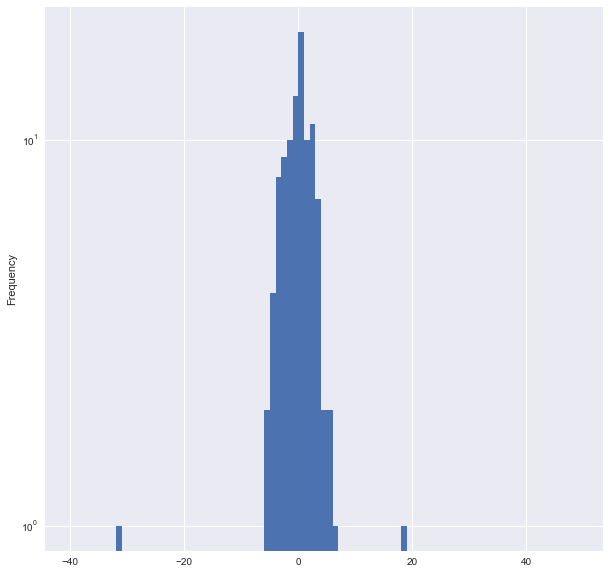

In [23]:
# plotting the histogram to see the quality of the data

fig, ax = plt.subplots(figsize = (10,10))
translation_data_df['diff'].plot(kind = "hist", bins=range(-40,50,1), log=True)
plt.show()


In [24]:
# checking if the difference between the number of words is graeter or lesser than 10

outlier_index = translation_data_df[(translation_data_df["diff"] > 10) | (translation_data_df["diff"] < -10)].index


In [25]:

list(outlier_index)


[66, 99]

In [26]:
# printing the sentences to check if the tags have been removed

translation_data_df.iloc[list(outlier_index)]


,English,German,word_count_en,word_count_de,diff
66,"According to previous reports, Commission Vice...",Verschiedenen Berichten zufolge würde der derz...,10,42,-32
99,Device for moulding foamed plastic articles. T...,Vorrichtung zum Giessen von Gegenständen aus g...,26,8,18


In [27]:
# removing the outlier sentences 

translation_data_df.drop(index=list(outlier_index), inplace=True)


In [28]:
# removing the redundant columns and resetting the indices

translation_data_df = translation_data_df.drop(columns="word_count_en")
translation_data_df = translation_data_df.drop(columns="word_count_de")
translation_data_df = translation_data_df.drop(columns="diff")
translation_data_df.reset_index(drop=True, inplace=True)


In [29]:
# checking the final shape of the data

translation_data_df.shape


(98, 2)

## 3. Saving the cleaned data

In [30]:
# store cleaned data

translation_data_df.to_excel("datascientist-task-data-files/cleaned_translation-data.xlsx", index=False)
